In [1]:
#  This script can be configured to run either a Hortonian or Dunne flow example
# using ParFlow. It is configured to run using the orthogonal grid
# using a PFSOLID file and to output total runoff.

# R. Maxwell, originally developed in 2009, updated PF Short Course 2019, updated to Python and Jupyter 2022
# reedmaxwell@princeton.edu

from parflow import Run
from parflow.tools.fs import get_absolute_path, cp, rm, mkdir, exists
import numpy as np

alpha_vG = 1

# set up directories
base_dir = get_absolute_path(".")
Dunne = Run("Dunne")
mkdir('dunne_over')

Dunne.FileVersion = 4

Dunne.Process.Topology.P = 1
Dunne.Process.Topology.Q = 1
Dunne.Process.Topology.R = 1

#---------------------------------------------------------
# Computational Grid
#---------------------------------------------------------
Dunne.ComputationalGrid.Lower.X = 0.0
Dunne.ComputationalGrid.Lower.Y = 0.0
Dunne.ComputationalGrid.Lower.Z = 0.0

Dunne.ComputationalGrid.NX = 20
Dunne.ComputationalGrid.NY = 1
Dunne.ComputationalGrid.NZ = 300

Dunne.ComputationalGrid.DX = 5.0
Dunne.ComputationalGrid.DY = 1.0
Dunne.ComputationalGrid.DZ = .05

#---------------------------------------------------------
# Domain Geometry
#---------------------------------------------------------
Dunne.GeomInput.Names = 'solidinput1'

Dunne.GeomInput.solidinput1.InputType = 'SolidFile'
Dunne.GeomInput.solidinput1.GeomNames = 'domain'
Dunne.GeomInput.solidinput1.FileName = '../domain.pfsol'

Dunne.Geom.domain.Patches = 'z_upper x_lower y_lower x_upper y_upper z_lower'

#-----------------------------------------------------------------------------
# Perm
#-----------------------------------------------------------------------------

Dunne.Geom.Perm.Names = 'domain'

# Values in m/hour

Dunne.Geom.domain.Perm.Type = 'Constant'
Dunne.Geom.domain.Perm.Value = 1.
Dunne.Geom.domain.Perm.Value = 0.001

Dunne.Perm.TensorType = 'TensorByGeom'

Dunne.Geom.Perm.TensorByGeom.Names = 'domain'

Dunne.Geom.domain.Perm.TensorValX = 1.0
Dunne.Geom.domain.Perm.TensorValY = 1.0
Dunne.Geom.domain.Perm.TensorValZ = 1.0

#-----------------------------------------------------------------------------
# Specific Storage
#-----------------------------------------------------------------------------

Dunne.SpecificStorage.Type = 'Constant'
Dunne.SpecificStorage.GeomNames = 'domain'
Dunne.Geom.domain.SpecificStorage.Value = 1.0e-5

#-----------------------------------------------------------------------------
# Phases
#-----------------------------------------------------------------------------

Dunne.Phase.Names = 'water'

Dunne.Phase.water.Density.Type = 'Constant'
Dunne.Phase.water.Density.Value = 1.0

Dunne.Phase.water.Viscosity.Type = 'Constant'
Dunne.Phase.water.Viscosity.Value = 1.0

#-----------------------------------------------------------------------------
# Contaminants
#-----------------------------------------------------------------------------

Dunne.Contaminants.Names = ''

#-----------------------------------------------------------------------------
# Retardation
#-----------------------------------------------------------------------------

Dunne.Geom.Retardation.GeomNames = ''

#-----------------------------------------------------------------------------
# Gravity
#-----------------------------------------------------------------------------

Dunne.Gravity = 1.0

#-----------------------------------------------------------------------------
# Setup timing info
#-----------------------------------------------------------------------------

# run for 3 hours @ 3min timesteps
#
Dunne.TimingInfo.BaseUnit = 0.01
Dunne.TimingInfo.StartCount = 0
Dunne.TimingInfo.StartTime = 0.0
Dunne.TimingInfo.StopTime = 1.0
Dunne.TimingInfo.DumpInterval = -1
Dunne.TimeStep.Type = 'Constant'
Dunne.TimeStep.Value = 0.01

#-----------------------------------------------------------------------------
# Porosity
#-----------------------------------------------------------------------------

Dunne.Geom.Porosity.GeomNames = 'domain'
Dunne.Geom.domain.Porosity.Type = 'Constant'
Dunne.Geom.domain.Porosity.Value = 0.01

#-----------------------------------------------------------------------------
# Domain
#-----------------------------------------------------------------------------

Dunne.Domain.GeomName = 'domain'

#-----------------------------------------------------------------------------
# Relative Permeability
#-----------------------------------------------------------------------------

Dunne.Phase.RelPerm.Type = 'VanGenuchten'
Dunne.Phase.RelPerm.GeomNames = 'domain'

Dunne.Geom.domain.RelPerm.Alpha = alpha_vG
Dunne.Geom.domain.RelPerm.N = 2.

#---------------------------------------------------------
# Saturation
#---------------------------------------------------------

Dunne.Phase.Saturation.Type = 'VanGenuchten'
Dunne.Phase.Saturation.GeomNames = 'domain'

Dunne.Geom.domain.Saturation.Alpha = alpha_vG
Dunne.Geom.domain.Saturation.N = 2.
Dunne.Geom.domain.Saturation.SRes = 0.2
Dunne.Geom.domain.Saturation.SSat = 1.0

#-----------------------------------------------------------------------------
# Wells
#-----------------------------------------------------------------------------
Dunne.Wells.Names = ''

#-----------------------------------------------------------------------------
# Time Cycles
#-----------------------------------------------------------------------------
Dunne.Cycle.Names = 'constant rainrec'
Dunne.Cycle.constant.Names = 'alltime'
Dunne.Cycle.constant.alltime.Length = 1
Dunne.Cycle.constant.Repeat = -1

# rainfall and recession time periods are defined here
# rain for 3 hours, recession for 2 hours (change to rain for a different time)
# this is a function of the BaseUnit set above, that is each length
# is an integer mulitplier of that value.  The BaseUnit happens to be equal
# to our timestep but that need not be the case, it's just good practice

Dunne.Cycle.rainrec.Names = 'rain rec'
Dunne.Cycle.rainrec.rain.Length = 30
Dunne.Cycle.rainrec.rec.Length = 70
Dunne.Cycle.rainrec.Repeat = -1


#-----------------------------------------------------------------------------
# Boundary Conditions: Pressure
#-----------------------------------------------------------------------------
# specify patches as a list for BC's
Dunne.BCPressure.PatchNames = 'z_upper x_lower y_lower x_upper y_upper z_lower'

Dunne.Patch.x_lower.BCPressure.Type = 'FluxConst'
Dunne.Patch.x_lower.BCPressure.Cycle = 'constant'
Dunne.Patch.x_lower.BCPressure.alltime.Value = 0.0

Dunne.Patch.y_lower.BCPressure.Type = 'FluxConst'
Dunne.Patch.y_lower.BCPressure.Cycle = 'constant'
Dunne.Patch.y_lower.BCPressure.alltime.Value = 0.0

Dunne.Patch.z_lower.BCPressure.Type = 'FluxConst'
Dunne.Patch.z_lower.BCPressure.Cycle = 'constant'
Dunne.Patch.z_lower.BCPressure.alltime.Value = 0.0

Dunne.Patch.x_upper.BCPressure.Type = 'FluxConst'
Dunne.Patch.x_upper.BCPressure.Cycle = 'constant'
Dunne.Patch.x_upper.BCPressure.alltime.Value = 0.0

Dunne.Patch.y_upper.BCPressure.Type = 'FluxConst'
Dunne.Patch.y_upper.BCPressure.Cycle = 'constant'
Dunne.Patch.y_upper.BCPressure.alltime.Value = 0.0

## overland flow boundary condition with very heavy rainfall then recession
Dunne.Patch.z_upper.BCPressure.Type = 'OverlandFlow'
Dunne.Patch.z_upper.BCPressure.Cycle = 'rainrec'
Dunne.Patch.z_upper.BCPressure.rain.Value = -0.02
Dunne.Patch.z_upper.BCPressure.rec.Value = 0.00

#---------------------------------------------------------
# Topo slopes in x-direction
#---------------------------------------------------------

Dunne.TopoSlopesX.Type = 'Constant'
Dunne.TopoSlopesX.GeomNames = 'domain'
Dunne.TopoSlopesX.Geom.domain.Value = 0.05

#---------------------------------------------------------
# Topo slopes in y-direction
#---------------------------------------------------------


Dunne.TopoSlopesY.Type = 'Constant'
Dunne.TopoSlopesY.GeomNames = 'domain'
Dunne.TopoSlopesY.Geom.domain.Value = 0.00

#---------------------------------------------------------
# Mannings coefficient
#---------------------------------------------------------

Dunne.Mannings.Type = 'Constant'
Dunne.Mannings.GeomNames = 'domain'
Dunne.Mannings.Geom.domain.Value = 1.e-5

#-----------------------------------------------------------------------------
# Phase sources:
#-----------------------------------------------------------------------------

Dunne.PhaseSources.water.Type = 'Constant'
Dunne.PhaseSources.water.GeomNames = 'domain'
Dunne.PhaseSources.water.Geom.domain.Value = 0.0

#-----------------------------------------------------------------------------
# Exact solution specification for error calculations
#-----------------------------------------------------------------------------

Dunne.KnownSolution = 'NoKnownSolution'


#-----------------------------------------------------------------------------
# Set solver parameters
#-----------------------------------------------------------------------------

Dunne.Solver = 'Richards'
Dunne.Solver.MaxIter = 2500

Dunne.Solver.Nonlinear.MaxIter = 300
Dunne.Solver.Nonlinear.ResidualTol = 1e-6
Dunne.Solver.Nonlinear.EtaChoice = 'Walker1'
Dunne.Solver.Nonlinear.EtaValue = 0.001
Dunne.Solver.Nonlinear.UseJacobian = False
#Dunne.Solver.Nonlinear.UseJacobian = True
Dunne.Solver.Nonlinear.DerivativeEpsilon = 1e-16
Dunne.Solver.Nonlinear.StepTol = 1e-20
Dunne.Solver.Nonlinear.Globalization = 'LineSearch'
Dunne.Solver.Linear.KrylovDimension = 20
Dunne.Solver.Linear.MaxRestart = 2

#Dunne.Solver.Linear.Preconditioner.PCMatrixType = 'FullJacobian'

Dunne.Solver.Linear.Preconditioner = 'MGSemi'
Dunne.Solver.PrintSubsurf = False
Dunne.Solver.Drop = 1E-20
Dunne.Solver.AbsTol = 1E-12

Dunne.Solver.PrintOverlandSum = True

# write out a lot of output as SILO Files
Dunne.Solver.WriteSiloSubsurfData = False
Dunne.Solver.WriteSiloPressure = False
Dunne.Solver.WriteSiloSaturation = False
Dunne.Solver.WriteSiloSlopes = False
Dunne.Solver.WriteSiloMask = False
Dunne.Solver.WriteSiloEvapTrans = False
Dunne.Solver.WriteSiloEvapTransSum = False
Dunne.Solver.WriteSiloOverlandSum = False
Dunne.Solver.WriteSiloMannings = False
Dunne.Solver.WriteSiloSpecificStorage = False

#---------------------------------------------------------
# Initial conditions: water pressure
#---------------------------------------------------------

# set water table to be level with the outlet of the domain
Dunne.ICPressure.Type = 'HydroStaticPatch'
Dunne.ICPressure.GeomNames = 'domain'
Dunne.Geom.domain.ICPressure.Value = 4.5
Dunne.Geom.domain.ICPressure.Value = 0.5

Dunne.Geom.domain.ICPressure.RefGeom = 'domain'
Dunne.Geom.domain.ICPressure.RefPatch = 'z_lower'

#--------
# Things that can be changed in the simulation to swap from Horton to Dunne flow
#--------

# increase the hydraulic conductivity
# if the K values are in m/h and the rainfall rate is 0.02 m/h what K is needed
# to create infiltration not overland flow? 
#Dunne.Geom.domain.Perm.Value = ?

# move the water table closer to the outlet, i.e. make it shallower
# if the initial pressure value is in meters from the bottom of the domain
# what value will create water table interactions?
#Dunne.Geom.domain.ICPressure.Value = ?

#-----------------------------------------------------------------------------
# Run and Unload the ParFlow output files
#-----------------------------------------------------------------------------

# create a subdirectory to run in, change to this directory
Dunne.run(base_dir+'/dunne_over')




# ==============================================================================
# ParFlow directory
#  - /home/SHARED/software/parflow/7c8e7f0
# ParFlow version
#  - 3.13.0
# Working directory
#  - /home/ms6985/ParFlow-project/Overland-flow-class/dunne_over
# ParFlow database
#  - Dunne.pfidb
# ==============================================================================


# ==============================================================================
# ParFlow ran successfully
# ==============================================================================



In [2]:
import parflow as pf

from glob import glob
import matplotlib.pyplot as plt
import numpy as np
from parflow.tools.fs import get_absolute_path, cp, rm, mkdir, exists


N=101
time    = np.arange(N)    # time array, we will probably want to swap with a date (not applicaple to JMH)
base_dir = get_absolute_path(".")

files = glob(base_dir+"/dunne_over/Dunne.out.satur.*.pfb")
sat = pf.read_pfb_sequence(files)
files = glob(base_dir+"/dunne_over/Dunne.out.press.*.pfb")
press = pf.read_pfb_sequence(files)
files = glob(base_dir+"/dunne_over/Dunne.out.overlandsum.*.pfb")
overland_sum = pf.read_pfb_sequence(files)


### Calculate total flow from the domain
to get total flow we use Manning's equation times the height of water $h$ times the width of the outlet, times the timestep

$q [m^3] = \dfrac{\sqrt{S_0}}{n}\times h^{2/3} \times h \times \Delta t \times \Delta y$

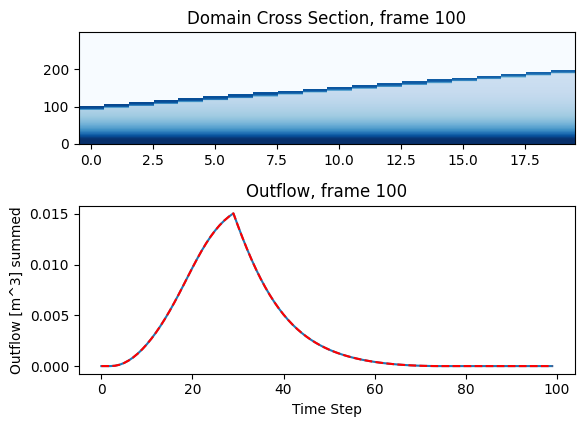

In [8]:
# slope and Manning's n
mannings = 1.e-5
slope = 0.05

# calculate outflow first by reading from ParFlow
outflow = overland_sum[:,0,0,0]  
##  next using manning's eq 
## total flow out of the domain is

outflow_m= (np.sqrt(slope)/mannings) * np.maximum(press[:,102,0,0],0.0)**(5.0/3.0)*0.01*1.0


# set a variable for the timestep plotted in saturation cross section
icount = 100

## Plot results
## three subplots
fig, ax = plt.subplots(2)

ax[0].cla()
ax[0].imshow(sat[icount,:,0,:],vmin=0.1, vmax=1.0,origin='lower',aspect=0.015,cmap='Blues',interpolation='none')  #,extent=[0,100,0,1])
ax[0].set_title("Domain Cross Section, frame {}".format(icount))

ax[1].cla()
ax[1].plot(time[:-1],outflow)
ax[1].plot(time[:-1],outflow_m[1:102],'r--')
ax[1].set_title("Outflow, frame {}".format(icount))
ax[1].set_xlabel("Time Step")
ax[1].set_ylabel("Outflow [m^3] summed")


plt.show()
